### Day 5

# PaSTAtistics

<img src = "images/logo.jpg", width="100" align="left">

<br><br><br><br>Instructor: Ram Narasimhan

Open this notebook on your laptops. Let's go these together, slowly, step-by-step.

We will work on it together

# <div class="alert alert-block alert-warning">  All of our Pasta Guesses have been loaded into a file.
Let's read that CSV file and answer the following questions:</div>


# <div class="alert alert-block alert-warning">  Q1: How many people have guessed. <br>What is the range of guesses (Max and Min guesses). </div>


# <div class="alert alert-block alert-warning">  Q2: What is the `mean` guess? <br> What is the `median` guess?</div>


# <div class="alert alert-block alert-warning">  Q3: Outlier Removal: What is the range of the middle 80% of the guesses?
</div>
This is one standard practice, wherein we can remove the outliers. Go and ahead think of ways to remove the top and bottom 10% of the guesses. Any thoughts on how to do this?
Search the Internet for "Removing Outliers from a Pandas column" and see if you find anything.


# <div class="alert alert-block alert-warning">  Q4: Plotting a Histogram.<br> The next logical thing we want to know, how are the guesses distributed?
</div>

A histogram is a very standard way of looking at the "distribution" of the guesses. Are they concentrated in one area? Are they uniformly spread across a wide range. This tells us a lot about the data.

We will use `Seaborn` to plot the histogram.


# <div class="alert alert-block alert-warning">  Q5: Creating a Boxplot.
</div>

Again, we will use `Seaborn` to plot the Box Plot of people's guesses.


# Solutions Follow...

Please think about each question before simply running the commands. (That way you will learn)

# <div class="alert alert-block alert-warning">  All of our Pasta Guesses have been loaded into a file.
Let's read that CSV file and answer the following questions:</div>


In [4]:
import numpy as np #load all needed modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#will create plots in the notebook itself
%matplotlib inline 


In [5]:
guess_df = pd.read_csv("data/pasta/pasta_guess.csv")

# <div class="alert alert-block alert-warning">  Q1: How many people have guessed. <br>What is the range of guesses (Max and Min guesses). </div>


In [7]:
# Number of people guessing is just the number of rows.
guess_df.shape

#If you want to be even more accurate...
guess_df.shape[0]
len(guess_df)

33

# <div class="alert alert-block alert-warning">  Q2: What is the `mean` guess? <br> What is the `median` guess?</div>


In [11]:
print(guess_df.columns)
print(guess_df.Guess.mean())
print(guess_df.Guess.median())

# Question to think about, is median or mean a better overall guess?

Index(['Family Name', 'First Name', 'Guess'], dtype='object')
445.3636363636364
350.0


# <div class="alert alert-block alert-warning">  Q3: Outlier Removal: What is the range of the middle 80% of the guesses?
</div>
This is one standard practice, wherein we can remove the outliers. Go and ahead think of ways to remove the top and bottom 10% of the guesses. Any thoughts on how to do this?
Search the Internet for "Removing Outliers from a Pandas column" and see if you find anything.


In [23]:
# We use the quantile function for this.

value90 = guess_df.Guess.quantile(.90)
value10 = guess_df.Guess.quantile(.10)

high_rows = guess_df.Guess > value90
low_rows = guess_df.Guess < value10



In [24]:
#verify:
#How many high rows should be there?
high_rows.sum()
low_rows.sum()

3

In [42]:
#Use a Boolean Mask. 
# In English: If a row is not high and if it is NOT Low, keep it.
#Delete the high and low rows... and keep the rest
keep_rows = ~high_rows & ~low_rows

In [67]:
guess_df[high_rows]
guess_df[low_rows]
guess_df[high_rows | low_rows]
guess_df[~high_rows & ~ low_rows]
guess_df[~(high_rows | row_rows)]
mid_df = guess_df[~(high_rows | row_rows)]

In [50]:
guess_df[keep_rows].shape
guess_df[keep_rows].median()

Guess    341.5
dtype: float64

# <div class="alert alert-block alert-warning">  Q4: Plotting a Histogram.<br> The next logical thing we want to know, how are the guesses distributed?
</div>

A histogram is a very standard way of looking at the "distribution" of the guesses. Are they concentrated in one area? Are they uniformly spread across a wide range. This tells us a lot about the data.

We will use `Seaborn` to plot the histogram.


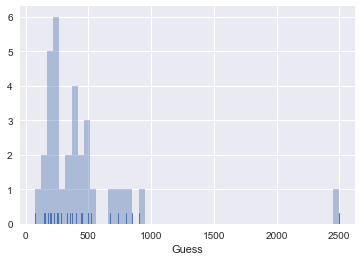

In [63]:
sns.distplot(guess_df.Guess, kde = False, bins= 50,rug=True)


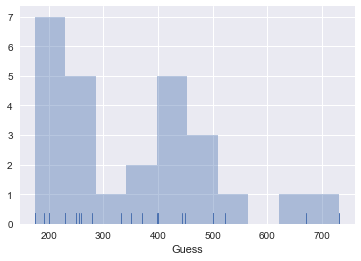

In [69]:
sns.distplot(mid_df.Guess, kde = False, bins= 10,rug=True)


# <div class="alert alert-block alert-warning">  Q5: Creating a Boxplot.
</div>

Again, we will use `Seaborn` to plot the Box Plot of people's guesses.


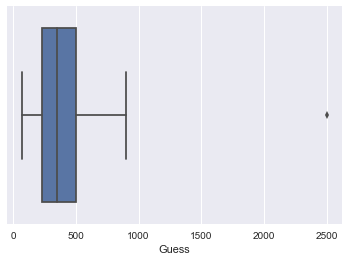

In [65]:
sns.boxplot(guess_df.Guess)

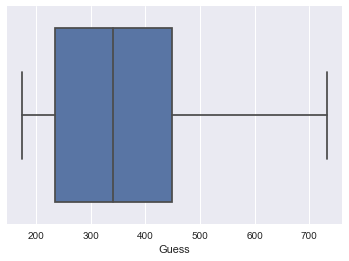

In [70]:
sns.boxplot(mid_df.Guess)

![Image Woc](images/wisdom_crowd_2.jpg)
<img src = "images/wisdom_crowd_1.jpg", width="250" align="left">

![Questions](images/questions.png)

# <div class="alert alert-block alert-warning">  Bonus: Frequency Counts...<br><br> Which English letter do most of the Family Names start with?
</div>

This is called the Frequency, or the count of the frequency of occurrences.

There is a one line command in Pandas to calculate the frequency...

For any column, we can calculate its `value_counts()` 


In [66]:
guess_df['Family Name'].value_counts()


A    10
H     3
S     3
D     2
N     2
C     2
M     2
B     2
I     1
Y     1
T     1
V     1
E     1
K     1
R     1
Name: Family Name, dtype: int64